### `1. Load the Dataset`
We'll load the data and provide the correct column names from the dataset's documentation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column names for the dataset
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the data
file_path = '../data/heart+disease/processed.cleveland.data'
df = pd.read_csv(file_path, header=None, names=column_names, na_values='?')

print("Initial data shape:", df.shape)
df.head()

Initial data shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### `2. Handle Missing Values`
Let's check for missing values and impute them using the median, which is robust to outliers.

In [4]:
# Check for missing values
print("Missing values before imputation:\n", df.isnull().sum())

# Impute missing values with the median of each column
for col in ['ca', 'thal']:
    median_val = df[col].median()
    # Reassign the column with the missing values filled
    df[col] = df[col].fillna(median_val)

print("\nMissing values after imputation:\n", df.isnull().sum())

Missing values before imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### `3. Data Encoding & Type Conversion`
Some columns are categorical but are read as numbers. Let's convert them. The target variable also needs adjustment: it has values from 0 (no disease) to 4. We'll convert it to a binary classification problem (0 = no disease, 1 = disease).

In [5]:
# Convert target to binary: 0 = no disease, 1 = disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# One-hot encode categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after one-hot encoding:", df.shape)
df.head()

Shape after one-hot encoding: (303, 21)


,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,1,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67.0,120.0,229.0,129.0,2.6,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


### `4. Standardize Numerical Features`
We'll use StandardScaler to scale numerical features to have a mean of 0 and a standard deviation of 1. This is important for models like SVM and Logistic Regression.

In [6]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


### `5. Exploratory Data Analysis (EDA)`
Visualize the data to find patterns.

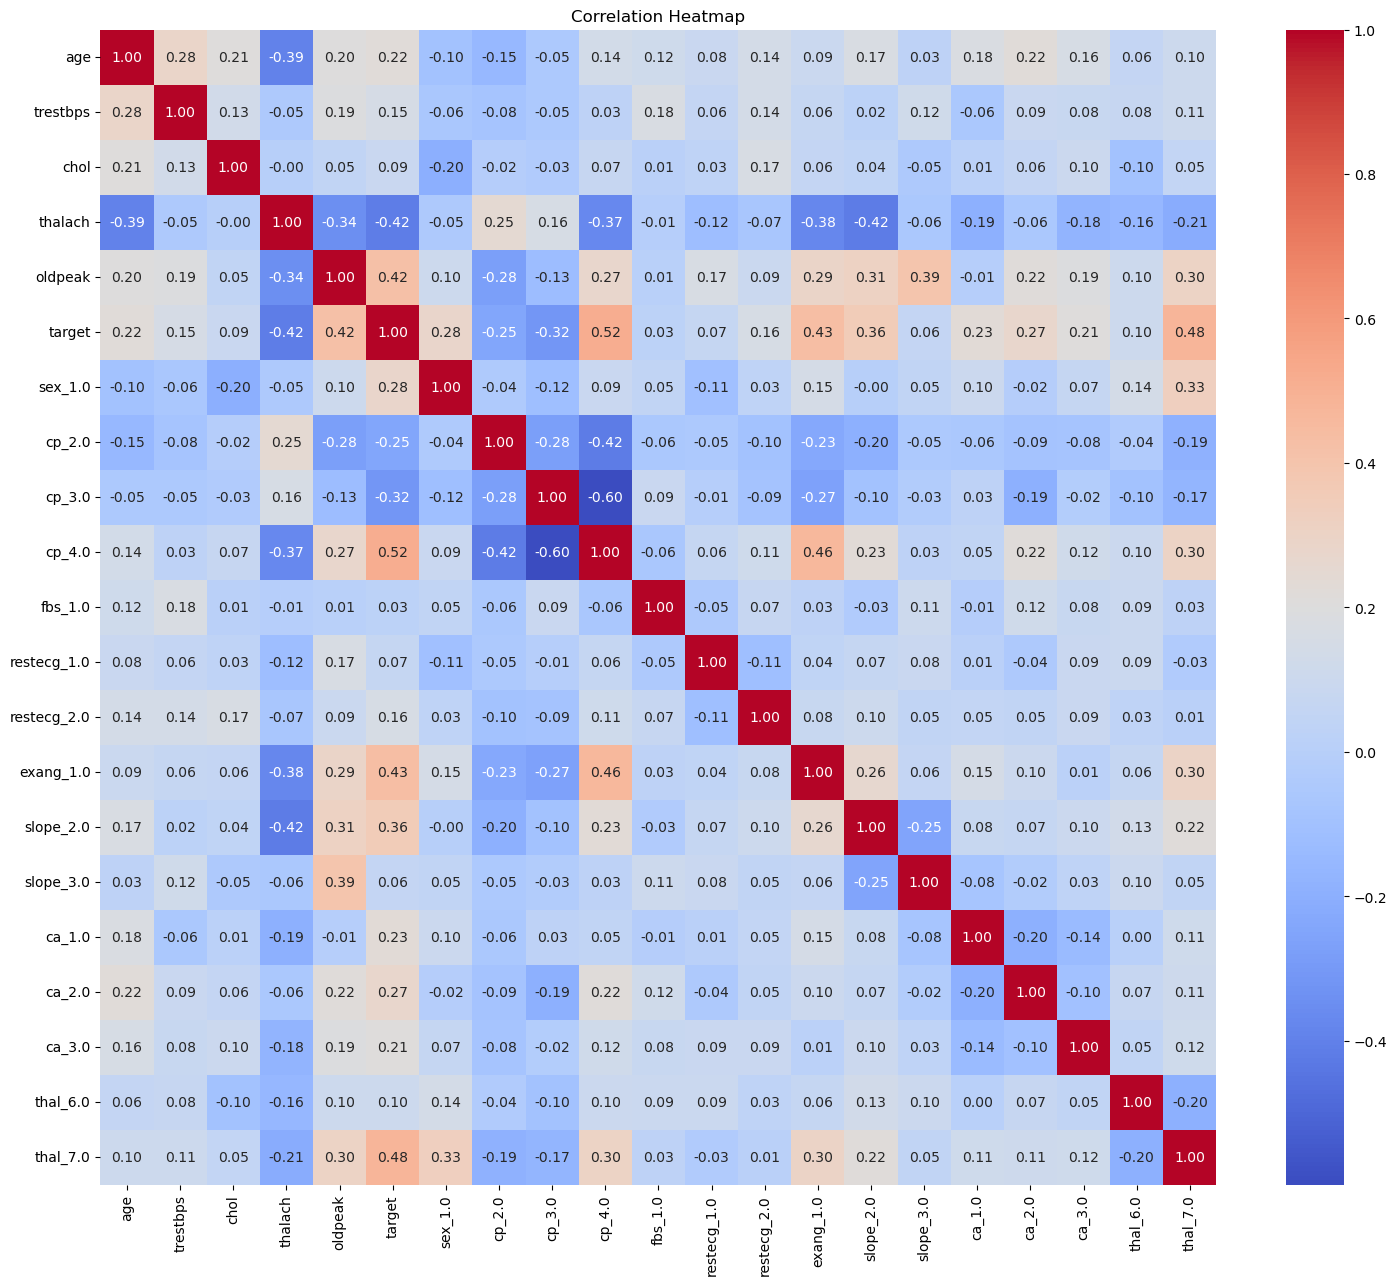

In [8]:
# Correlation Heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

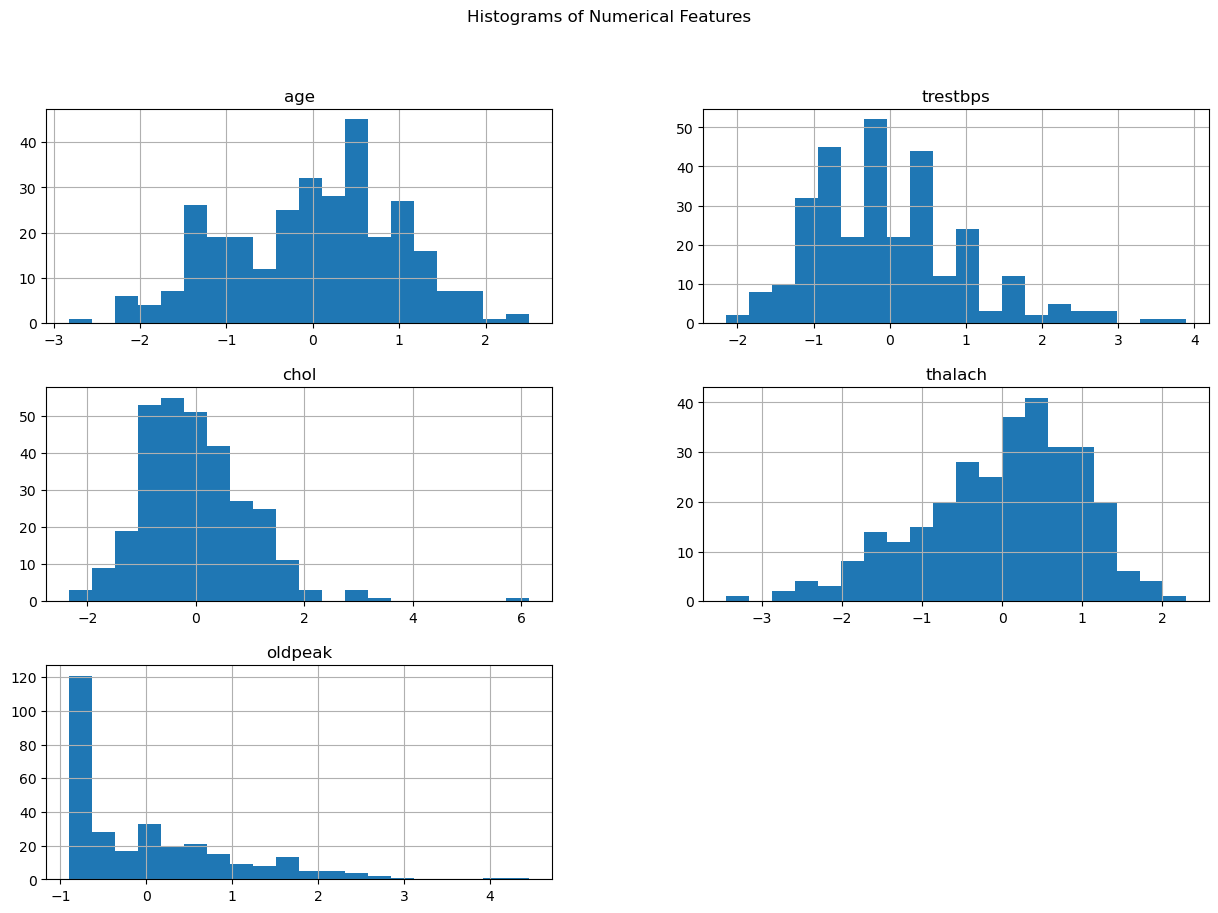

In [9]:

# Histograms for numerical features
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [10]:
# Save the cleaned DataFrame to a new CSV file.

df.to_csv('../data/cleaned_heart_disease.csv', index=False)